In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df1=insurance_dataset.select_dtypes(include=['object'])
df1

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [9]:
df2=insurance_dataset.select_dtypes(include=['int64','float64'])
df2=df2.drop('children',axis=1)

In [10]:
x1=df2.drop('charges',axis=1)
y1=df2['charges']

In [11]:
from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
scaled_data=mscaler.fit_transform(x1)
scaled_data

array([[0.02173913, 0.3212268 ],
       [0.        , 0.47914985],
       [0.2173913 , 0.45843422],
       ...,
       [0.        , 0.56201238],
       [0.06521739, 0.26472962],
       [0.93478261, 0.35270379]])

In [12]:
x1_columns=x1.columns

In [13]:
df2_new=pd.DataFrame(scaled_data,columns=x1_columns).reset_index(drop='index')
df2_new

,age,bmi
0,0.021739,0.321227
1,0.000000,0.479150
2,0.217391,0.458434
3,0.326087,0.181464
4,0.304348,0.347592
...,...,...
1333,0.695652,0.403820
1334,0.000000,0.429379
1335,0.000000,0.562012
1336,0.065217,0.264730


In [14]:
df2_new1=pd.concat([df2_new,y1],axis=1)
df2_new1

,age,bmi,charges
0,0.021739,0.321227,16884.92400
1,0.000000,0.479150,1725.55230
2,0.217391,0.458434,4449.46200
3,0.326087,0.181464,21984.47061
4,0.304348,0.347592,3866.85520
...,...,...,...
1333,0.695652,0.403820,10600.54830
1334,0.000000,0.429379,2205.98080
1335,0.000000,0.562012,1629.83350
1336,0.065217,0.264730,2007.94500


In [15]:
df3=df1.apply(lambda x:pd.factorize(x)[0])
df3

,sex,smoker,region
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,2
4,1,1,2
...,...,...,...
1333,1,1,2
1334,0,1,3
1335,0,1,1
1336,0,1,0


In [16]:
df4=pd.concat([df3,df2_new1],axis=1)
df4

,sex,smoker,region,age,bmi,charges
0,0,0,0,0.021739,0.321227,16884.92400
1,1,1,1,0.000000,0.479150,1725.55230
2,1,1,1,0.217391,0.458434,4449.46200
3,1,1,2,0.326087,0.181464,21984.47061
4,1,1,2,0.304348,0.347592,3866.85520
...,...,...,...,...,...,...
1333,1,1,2,0.695652,0.403820,10600.54830
1334,0,1,3,0.000000,0.429379,2205.98080
1335,0,1,1,0.000000,0.562012,1629.83350
1336,0,1,0,0.065217,0.264730,2007.94500


In [17]:
df4=df4.drop('region',axis=1)
df4

,sex,smoker,age,bmi,charges
0,0,0,0.021739,0.321227,16884.92400
1,1,1,0.000000,0.479150,1725.55230
2,1,1,0.217391,0.458434,4449.46200
3,1,1,0.326087,0.181464,21984.47061
4,1,1,0.304348,0.347592,3866.85520
...,...,...,...,...,...
1333,1,1,0.695652,0.403820,10600.54830
1334,0,1,0.000000,0.429379,2205.98080
1335,0,1,0.000000,0.562012,1629.83350
1336,0,1,0.065217,0.264730,2007.94500


In [18]:
x2=df4.drop('charges',axis=1)
y2=df4['charges']

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

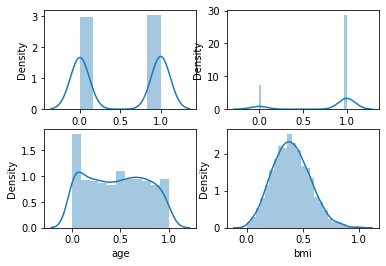

In [19]:
# Define the number of rows and columns you want
n_rows=2
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
for i, column in enumerate(x2.columns):
    sns.distplot(x2[column],ax=axes[i//n_cols,i%n_cols])

In [20]:
from scipy import stats
for col in x2.columns:
    stat, p_value = stats.shapiro(x2[col])
    print(f'Statistic for {col}: {stat}, P-Value: {p_value}')

Statistic for sex: 0.6365700960159302, P-Value: 0.0
Statistic for smoker: 0.4950445890426636, P-Value: 0.0
Statistic for age: 0.9446991682052612, P-Value: 5.687479624670986e-22
Statistic for bmi: 0.9938869476318359, P-Value: 2.606953239592258e-05


Only age and bmi are close to normal distribution and all of them has p vallue <0.5 means the hypothesisi they follow normal distribution is rejected so we have to convert them to normal dist.

In [21]:
from sklearn.preprocessing import QuantileTransformer
quant=QuantileTransformer()
x2_transformed=quant.fit_transform(x2)
x2_transformed

array([[0.        , 0.        , 0.07657658, 0.3427272 ],
       [1.        , 1.        , 0.        , 0.7047047 ],
       [1.        , 1.        , 0.28078078, 0.65715716],
       ...,
       [0.        , 1.        , 0.        , 0.83983984],
       [0.        , 1.        , 0.13463463, 0.22522523],
       [0.        , 0.        , 0.94094094, 0.42011834]])

In [22]:
x2_transformed_df=pd.DataFrame(x2_transformed,columns=x2.columns).reset_index(drop='index')
x2_transformed_df

,sex,smoker,age,bmi
0,0.0,0.0,0.076577,0.342727
1,1.0,1.0,0.000000,0.704705
2,1.0,1.0,0.280781,0.657157
3,1.0,1.0,0.381381,0.092092
4,1.0,1.0,0.361361,0.404404
...,...,...,...,...
1333,1.0,1.0,0.723223,0.539401
1334,0.0,1.0,0.000000,0.594595
1335,0.0,1.0,0.000000,0.839840
1336,0.0,1.0,0.134635,0.225225


In [23]:
x2_transformed_df['children']=insurance_dataset['children']
x2_transformed_df['region']=df3['region']
x2_transformed_df

,sex,smoker,age,bmi,children,region
0,0.0,0.0,0.076577,0.342727,0,0
1,1.0,1.0,0.000000,0.704705,1,1
2,1.0,1.0,0.280781,0.657157,3,1
3,1.0,1.0,0.381381,0.092092,0,2
4,1.0,1.0,0.361361,0.404404,0,2
...,...,...,...,...,...,...
1333,1.0,1.0,0.723223,0.539401,3,2
1334,0.0,1.0,0.000000,0.594595,0,3
1335,0.0,1.0,0.000000,0.839840,0,1
1336,0.0,1.0,0.134635,0.225225,0,0


In [24]:
x2_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   float64
 1   smoker    1338 non-null   float64
 2   age       1338 non-null   float64
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   region    1338 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 62.8 KB


C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

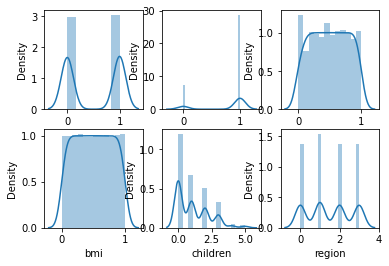

In [25]:
# Define the number of rows and columns you want
n_rows=2
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
for i, column in enumerate(x2_transformed_df.columns):
    sns.distplot(x2_transformed_df[column],ax=axes[i//n_cols,i%n_cols])

In [26]:
for col in x2_transformed_df.columns:
    stat, p_value = stats.shapiro(x2_transformed_df[col])
    print(f'Statistic for {col}: {stat}, P-Value: {p_value}')

Statistic for sex: 0.6365700960159302, P-Value: 0.0
Statistic for smoker: 0.4950445890426636, P-Value: 0.0
Statistic for age: 0.9565504193305969, P-Value: 1.6334469972934177e-19
Statistic for bmi: 0.9548373818397522, P-Value: 6.753949088541078e-20
Statistic for children: 0.8231803774833679, P-Value: 5.066361280494088e-36
Statistic for region: 0.8594433069229126, P-Value: 5.870974576429252e-33


In [27]:
x2_transformed_df.drop('bmi', axis=1)
x2_transformed_df['bmi']=x2['bmi']

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

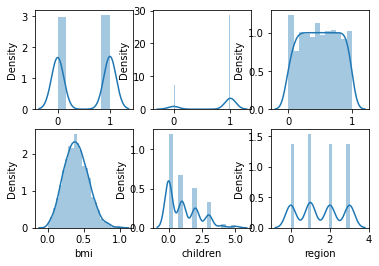

In [28]:
# Define the number of rows and columns you want
n_rows=2
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
for i, column in enumerate(x2_transformed_df.columns):
    sns.distplot(x2_transformed_df[column],ax=axes[i//n_cols,i%n_cols])

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


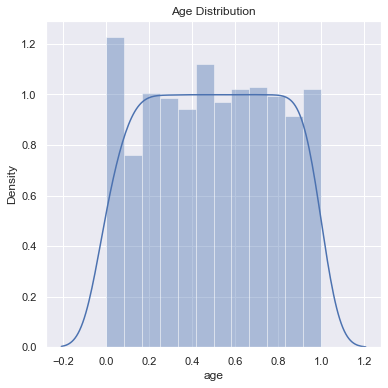

In [29]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(x2_transformed_df['age'])
plt.title('Age Distribution')
plt.show()

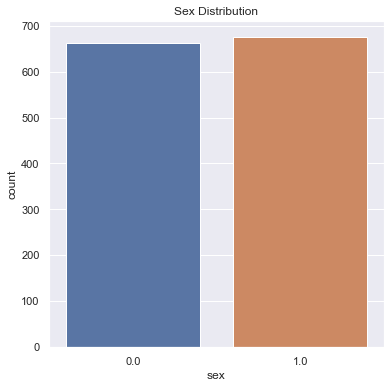

In [30]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=x2_transformed_df)# 0:female and 1:male
plt.title('Sex Distribution')
plt.show()

In [31]:
x2_transformed_df['sex'].value_counts()

1.0    676
0.0    662
Name: sex, dtype: int64

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


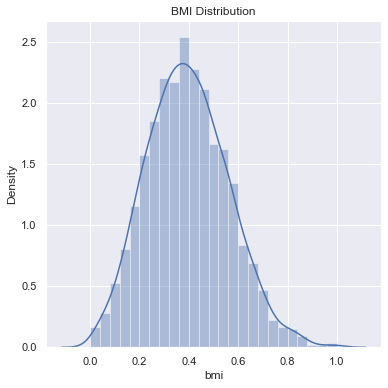

In [32]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(x2_transformed_df['bmi'])
plt.title('BMI Distribution')
plt.show()

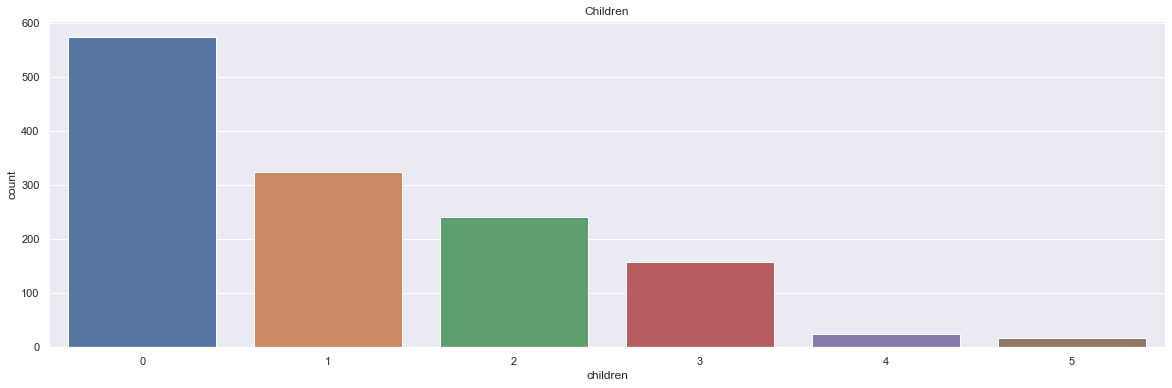

In [33]:
# children column
plt.figure(figsize=(20,6))
sns.countplot(x='children', data=x2_transformed_df)
plt.title('Children')
plt.show()

In [34]:
x2_transformed_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

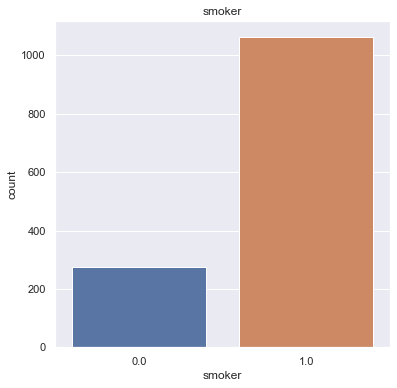

In [35]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=x2_transformed_df)#0:yes and 1:no
plt.title('smoker')
plt.show()

In [36]:
x2_transformed_df['smoker'].value_counts()

1.0    1064
0.0     274
Name: smoker, dtype: int64

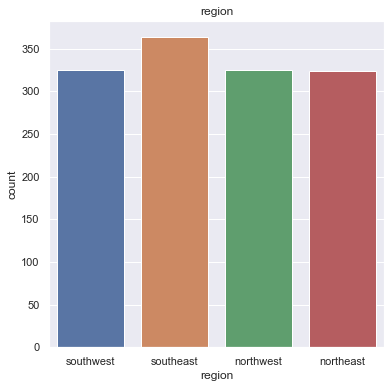

In [37]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

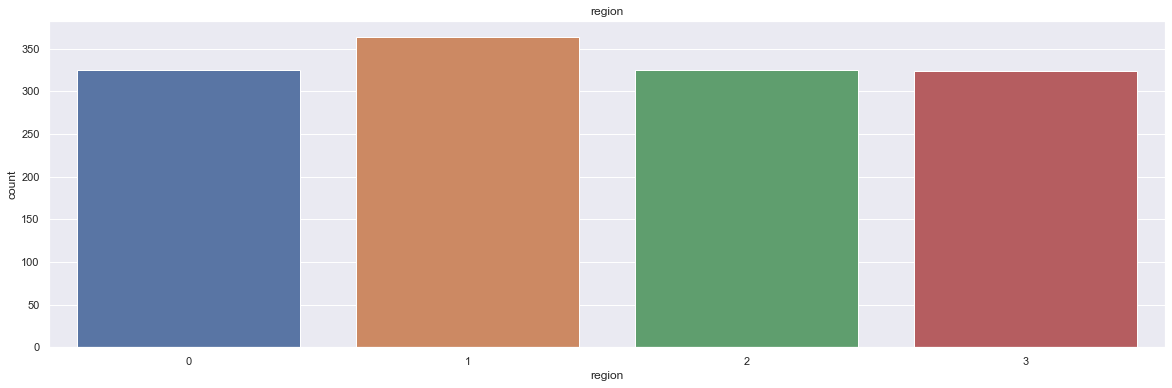

In [38]:
# region column
plt.figure(figsize=(20,6))
sns.countplot(x='region', data=x2_transformed_df)#0:southwest  1:southeast  2:northwest  3:northeast
plt.title('region')
plt.show()

In [39]:
x2_transformed_df['region'].value_counts()

1    364
0    325
2    325
3    324
Name: region, dtype: int64

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


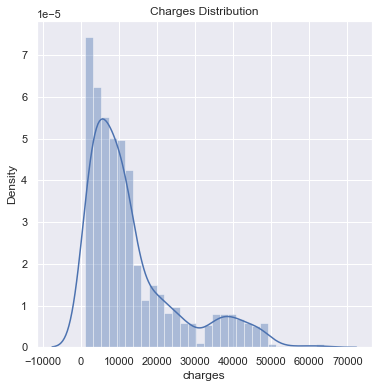

In [40]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(y2)# y2 has charges data
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing and 
Encoding the categorical features

Splitting the Features and Target

In [41]:
X = x2_transformed_df
Y = y2

In [42]:
X['smoker']=X['smoker'].astype(int)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   float64
 1   smoker    1338 non-null   int32  
 2   age       1338 non-null   float64
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   region    1338 non-null   int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 57.6 KB


In [44]:
print(X)

      sex  smoker       age       bmi  children  region
0     0.0       0  0.076577  0.321227         0       0
1     1.0       1  0.000000  0.479150         1       1
2     1.0       1  0.280781  0.458434         3       1
3     1.0       1  0.381381  0.181464         0       2
4     1.0       1  0.361361  0.347592         0       2
...   ...     ...       ...       ...       ...     ...
1333  1.0       1  0.723223  0.403820         3       2
1334  0.0       1  0.000000  0.429379         0       3
1335  0.0       1  0.000000  0.562012         0       1
1336  0.0       1  0.134635  0.264730         0       0
1337  0.0       0  0.940941  0.352704         0       2

[1338 rows x 6 columns]


In [45]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [48]:
#from skfeature.function.similarity_based import fisher_score
#ranks=fisher_score.fisher_score(X,Y)
#feature_rank=pd.Series(ranks,X.columns)
#plt.figure(figsize=(40,30))
#feature_rank.plot(kind='barh',color='teal')
#plt.show()

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


ValueError: Length of values (1) does not match length of index (6)

In [50]:
pip install featurewiz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: fsspec>=0.3.3 in c:\users\divya chitransh\anaconda3\lib\site-packages (from featurewiz) (2022.2.0)

  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2457 sha256=3ce4934b170202aa09add24bd67d68b67afc73ef718ff2938d08a4e172fc4bc8
  Stored in directory: c:\users\divya chitransh\appdata\local\pip\cache\wheels\e3\dc\eb\3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
Successfully built feather-format


In [54]:
from featurewiz import FeatureWiz
fwiz = FeatureWiz(corr_limit=0.50, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)

featurewiz is given 0.5 as correlation limit...
    Skipping feature engineering since no feature_engg input...
    final list of category encoders given: ['label', 'label']


Loaded input data. Shape = (1070, 6)
    selecting 6 numeric features for further processing...
#### Starting featurewiz transform for train data ####
    Regression models don't need targets to be transformed to numeric...
    Single_Label Regression problem 
Shape of dataset: (1070, 6). Now we classify variables into different types...
    Returning dictionary for variable types with following keys:
                        continuous_vars = 3, int_vars = 3, 
                        discrete_string_vars = 0, nlp_vars = 0,
                        date_vars = 0, time_deltas = 0,
                        categorical_vars = 0, date_zones = 0
    no date time variables detected in this dataset
label encoder selected for transforming all categorical variables
Using My_LabelEncoder() and My_LabelEncoder() as encoders
    alert: there is no scaler specified. Options are: max, std, robust, maxabs.
Check the pipeline creation statement for errors (if any):
	make_column_transformer((imp, intvars)

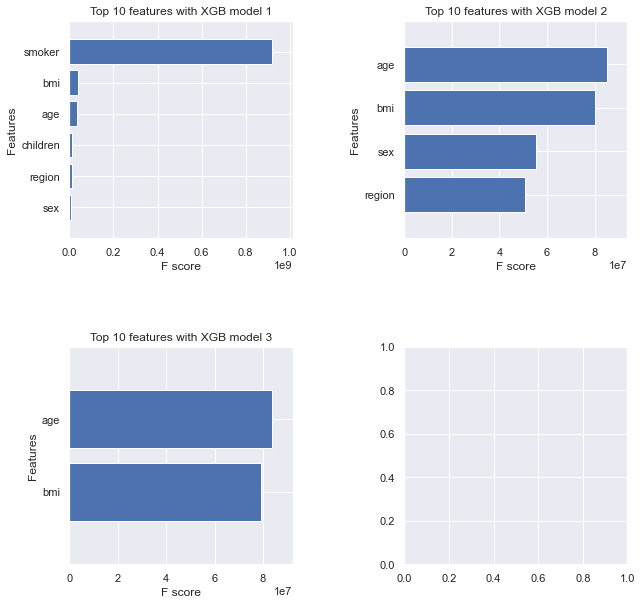

    time taken to run entire featurewiz = 1 second(s)
Recursive XGBoost selected 3 features...
#### Starting featurewiz transform for test data ####
Loaded input data. Shape = (268, 6)
#### Starting lazytransform for test data ####
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (268, 6)
Returning dataframe with 3 features 


['smoker', 'bmi', 'age']

In [55]:
X_train_selected = fwiz.fit_transform(X_train, Y_train)
X_test_selected = fwiz.transform(X_test)
### get list of selected features ###
fwiz.features  

In [58]:
X_train_selected

(      smoker       bmi       age
 882        1  0.166129  0.134635
 505        1  0.401264  0.456957
 798        1  0.461125  0.887387
 792        1  0.194243  0.155155
 201        1  0.437719  0.680681
 ...      ...       ...       ...
 466        1  0.342750  0.923924
 299        1  0.347592  0.680681
 493        1  0.738230  0.940941
 527        1  0.264730  0.744745
 1192       1  0.442158  0.887387
 
 [1070 rows x 3 columns],
 882      2585.85065
 505      6796.86325
 798     11848.14100
 792      2731.91220
 201      8871.15170
            ...     
 466     13224.69300
 299      9249.49520
 493     12574.04900
 527      9861.02500
 1192    13019.16105
 Name: charges, Length: 1070, dtype: float64)

Model Training and linear regression

In [59]:
X_new=X.loc[:,['smoker', 'bmi', 'age']]
X_new

,smoker,bmi,age
0,0,0.321227,0.076577
1,1,0.479150,0.000000
2,1,0.458434,0.280781
3,1,0.181464,0.381381
4,1,0.347592,0.361361
...,...,...,...
1333,1,0.403820,0.723223
1334,1,0.429379,0.000000
1335,1,0.562012,0.000000
1336,1,0.264730,0.134635


In [60]:
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y, test_size=0.2, random_state=2)

In [61]:
# loading the Linear Regression model
regressor = LinearRegression()

In [62]:
#from mlxtend.feature_selection import SequentialFeatureSelector
#ffs=SequentialFeatureSelector(regressor,k_features='best', forward=True,n_jobs=-1)
#ffs.fit(X,Y)
#features=list(ffs.k_feature_names_)
#features

In [63]:
#features=list(map(int,features))
#regressor.fit(X_train[features],Y_train)
#y_pre=regressor.predict(X_train[features])

In [64]:
regressor.fit(X_train_new, Y_train_new)

LinearRegression()

model evaluation

In [66]:
# prediction on training data
training_data_prediction =regressor.predict(X_train_new)

In [67]:
# R squared value
r2_train = metrics.r2_score(Y_train_new, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7478308840164114


In [68]:
# prediction on test data
test_data_prediction =regressor.predict(X_test_new)

In [69]:
# R squared value
r2_test = metrics.r2_score(Y_test_new, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7445445454116983


build a predictive system

In [74]:
input_data = (1,25.74,31)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[683742.54691628]
The insurance cost is USD  683742.5469162773
